In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import plotly.express as px
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier,AdaBoostClassifier,BaggingClassifier,GradientBoostingClassifier
import xgboost as xgb
%matplotlib inline
import pickle
from sklearn import model_selection
from scipy.stats import ttest_ind
from sklearn import metrics

In [2]:
import warnings
warnings.filterwarnings('ignore')

plt.style.use('fivethirtyeight')
%matplotlib inline

In [3]:
# loading data

df= pd.read_csv("C:\\Users\\iykeo\\OneDrive\\Desktop\\FINAL PROJECT\\Liver disease.csv")
df.head()

Age  Gender  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
0   65  Female              0.7               0.1                   187   
1   62    Male             10.9               5.5                   699   
2   62    Male              7.3               4.1                   490   
3   58    Male              1.0               0.4                   182   
4   72    Male              3.9               2.0                   195   

   Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  \
0                        16                          18             6.8   
1                        64                         100             7.5   
2                        60                          68             7.0   
3                        14                          20             6.8   
4                        27                          59             7.3   

   Albumin  Albumin_and_Globulin_Ratio  Dataset  
0      3.3                        0.90        1  
1      3.2                        0.74        1  
2      3.3                        0.89        1  
3      3.4                        1.00        1  
4      2.4                        0.40        1

In [4]:
df.shape

(583, 11)

In [5]:
# obtaining columns
list(df.columns)

['Age',
 'Gender',
 'Total_Bilirubin',
 'Direct_Bilirubin',
 'Alkaline_Phosphotase',
 'Alamine_Aminotransferase',
 'Aspartate_Aminotransferase',
 'Total_Protiens',
 'Albumin',
 'Albumin_and_Globulin_Ratio',
 'Dataset']

In [6]:
# Rename the 'Dataset' column to 'LiverCondition'
df.rename(columns={'Dataset': 'LiverCondition'}, inplace=True)

In [7]:
# Rename the 'Alamine_Aminotransferase' column to 'Alanine_Aminotransferase'
df.rename(columns={'Alamine_Aminotransferase': 'Alanine_Aminotransferase'}, inplace=True)

In [8]:
# Verify the column name change
df.head()

Age  Gender  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
0   65  Female              0.7               0.1                   187   
1   62    Male             10.9               5.5                   699   
2   62    Male              7.3               4.1                   490   
3   58    Male              1.0               0.4                   182   
4   72    Male              3.9               2.0                   195   

   Alanine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  \
0                        16                          18             6.8   
1                        64                         100             7.5   
2                        60                          68             7.0   
3                        14                          20             6.8   
4                        27                          59             7.3   

   Albumin  Albumin_and_Globulin_Ratio  LiverCondition  
0      3.3                        0.90               1  
1      3.2                        0.74               1  
2      3.3                        0.89               1  
3      3.4                        1.00               1  
4      2.4                        0.40               1

In [9]:
# data types of each column
print(df.dtypes)

Age                             int64
Gender                         object
Total_Bilirubin               float64
Direct_Bilirubin              float64
Alkaline_Phosphotase            int64
Alanine_Aminotransferase        int64
Aspartate_Aminotransferase      int64
Total_Protiens                float64
Albumin                       float64
Albumin_and_Globulin_Ratio    float64
LiverCondition                  int64
dtype: object


In [12]:
# Summary Statistics
summary_stats = df.describe().T
summary_stats

count        mean         std   min    25%  \
Age                         583.0   44.746141   16.189833   4.0   33.0   
Total_Bilirubin             583.0    3.298799    6.209522   0.4    0.8   
Direct_Bilirubin            583.0    1.486106    2.808498   0.1    0.2   
Alkaline_Phosphotase        583.0  290.576329  242.937989  63.0  175.5   
Alanine_Aminotransferase    583.0   80.713551  182.620356  10.0   23.0   
Aspartate_Aminotransferase  583.0  109.910806  288.918529  10.0   25.0   
Total_Protiens              583.0    6.483190    1.085451   2.7    5.8   
Albumin                     583.0    3.141852    0.795519   0.9    2.6   
Albumin_and_Globulin_Ratio  579.0    0.947064    0.319592   0.3    0.7   
LiverCondition              583.0    1.286449    0.452490   1.0    1.0   

                               50%    75%     max  
Age                          45.00   58.0    90.0  
Total_Bilirubin               1.00    2.6    75.0  
Direct_Bilirubin              0.30    1.3    19.7  
Alkaline_Phosphotase        208.00  298.0  2110.0  
Alanine_Aminotransferase     35.00   60.5  2000.0  
Aspartate_Aminotransferase   42.00   87.0  4929.0  
Total_Protiens                6.60    7.2     9.6  
Albumin                       3.10    3.8     5.5  
Albumin_and_Globulin_Ratio    0.93    1.1     2.8  
LiverCondition                1.00    2.0     2.0

In [13]:
# data info and non-null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alanine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  LiverCondition              583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


Here is the observation from the dataset:
1) Only gender is non-numeric veriable. All others are numeric.
2) There are 10 features and 1 output - dataset. Value 1 indicates that the patient has liver disease and 0 indicates the patient does not have liver disease.

In [14]:
# Encode categorical variables (Gender column)
gender_mapping = {"Male": 1, "Female": 0}
df['Gender'] = df['Gender'].map(gender_mapping)

Handling missing values

In [15]:
# Check for missing values
df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alanine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
LiverCondition                0
dtype: int64

In [16]:
# Imputing missing values with the mean
df.Albumin_and_Globulin_Ratio.fillna(df.Albumin_and_Globulin_Ratio.mean(), inplace=True)

In [17]:
# Confirming missing values has been hanled
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alanine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
LiverCondition                0
dtype: int64


Encoding the output feature 'Liver Condition' in a better way

In [18]:
#No liver disease then:=0 for patients having liver disease then:=1
df['LiverCondition'] = df['LiverCondition'].map({2:0,1:1})

In [19]:
#Verify changes
df.head()

Age  Gender  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
0   65       0              0.7               0.1                   187   
1   62       1             10.9               5.5                   699   
2   62       1              7.3               4.1                   490   
3   58       1              1.0               0.4                   182   
4   72       1              3.9               2.0                   195   

   Alanine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  \
0                        16                          18             6.8   
1                        64                         100             7.5   
2                        60                          68             7.0   
3                        14                          20             6.8   
4                        27                          59             7.3   

   Albumin  Albumin_and_Globulin_Ratio  LiverCondition  
0      3.3                        0.90               1  
1      3.2                        0.74               1  
2      3.3                        0.89               1  
3      3.4                        1.00               1  
4      2.4                        0.40               1

In [20]:
# count the data in each category of liver condition (normal and diseased)
df.groupby('LiverCondition').count()

Age  Gender  Total_Bilirubin  Direct_Bilirubin  \
LiverCondition                                                   
0               167     167              167               167   
1               416     416              416               416   

                Alkaline_Phosphotase  Alanine_Aminotransferase  \
LiverCondition                                                   
0                                167                       167   
1                                416                       416   

                Aspartate_Aminotransferase  Total_Protiens  Albumin  \
LiverCondition                                                        
0                                      167             167      167   
1                                      416             416      416   

                Albumin_and_Globulin_Ratio  
LiverCondition                              
0                                      167  
1                                      416

The above output shows we have data imbalance which would be addressed before training our models

Baseline Explorative Data Analysis

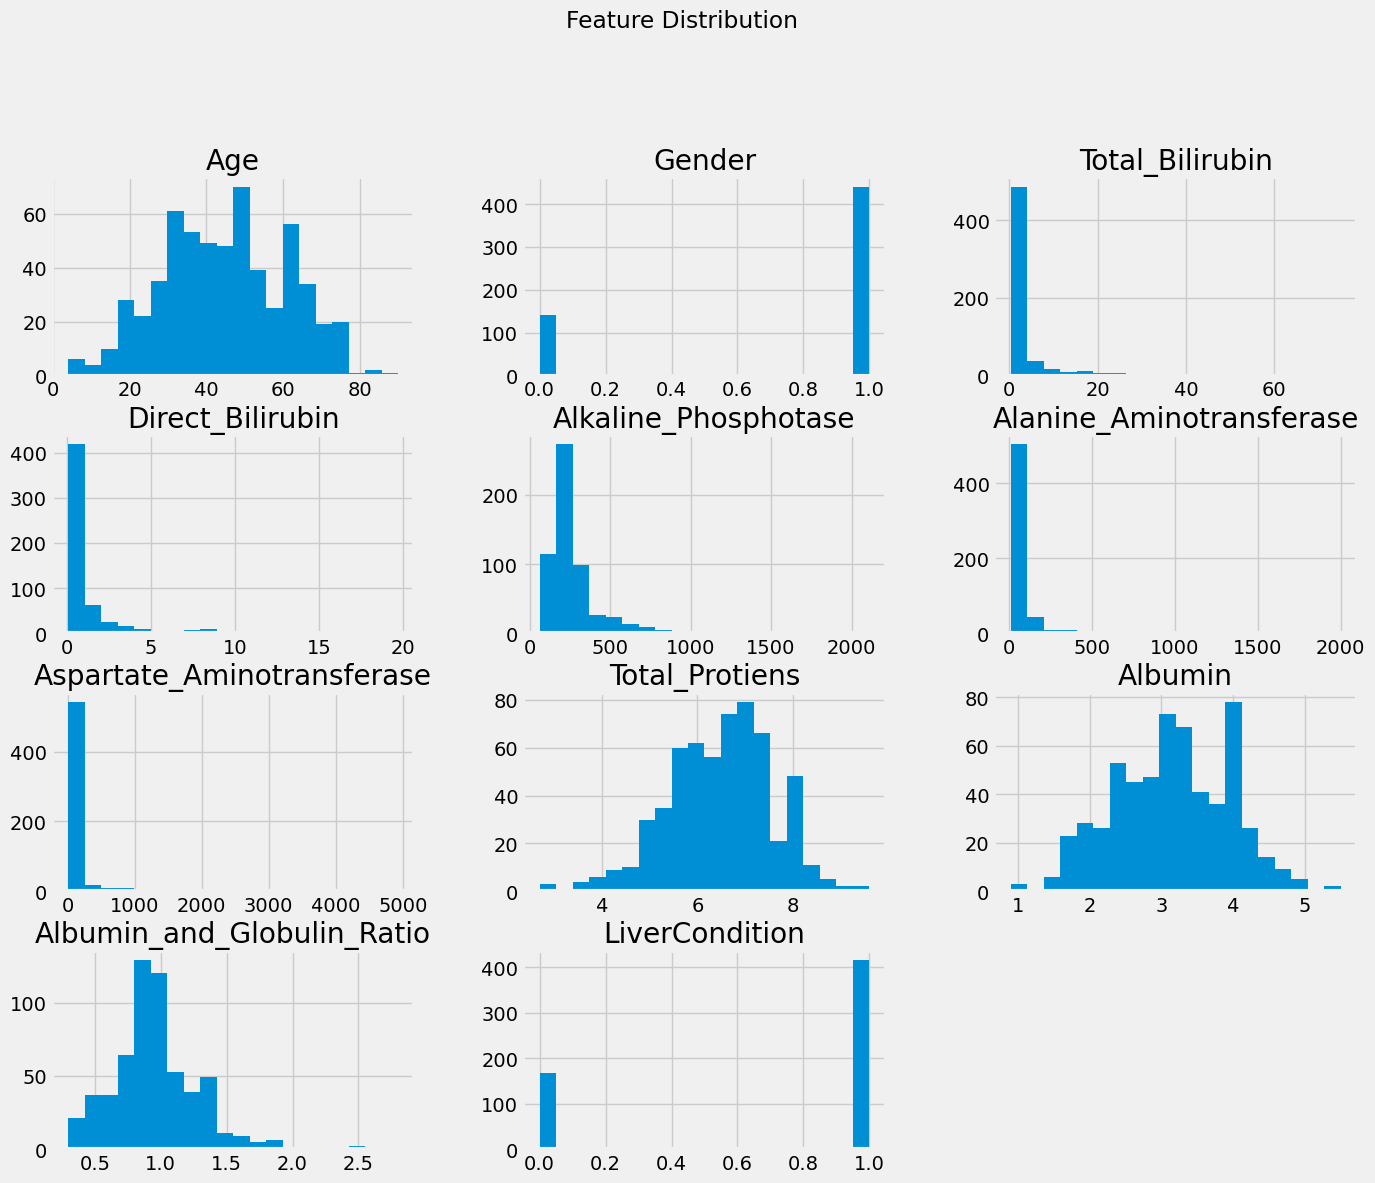

In [21]:
# Visualize distribution of each feature
df.hist(bins=20, figsize=(15, 12))
plt.suptitle("Feature Distribution", y=1.02)
plt.show()

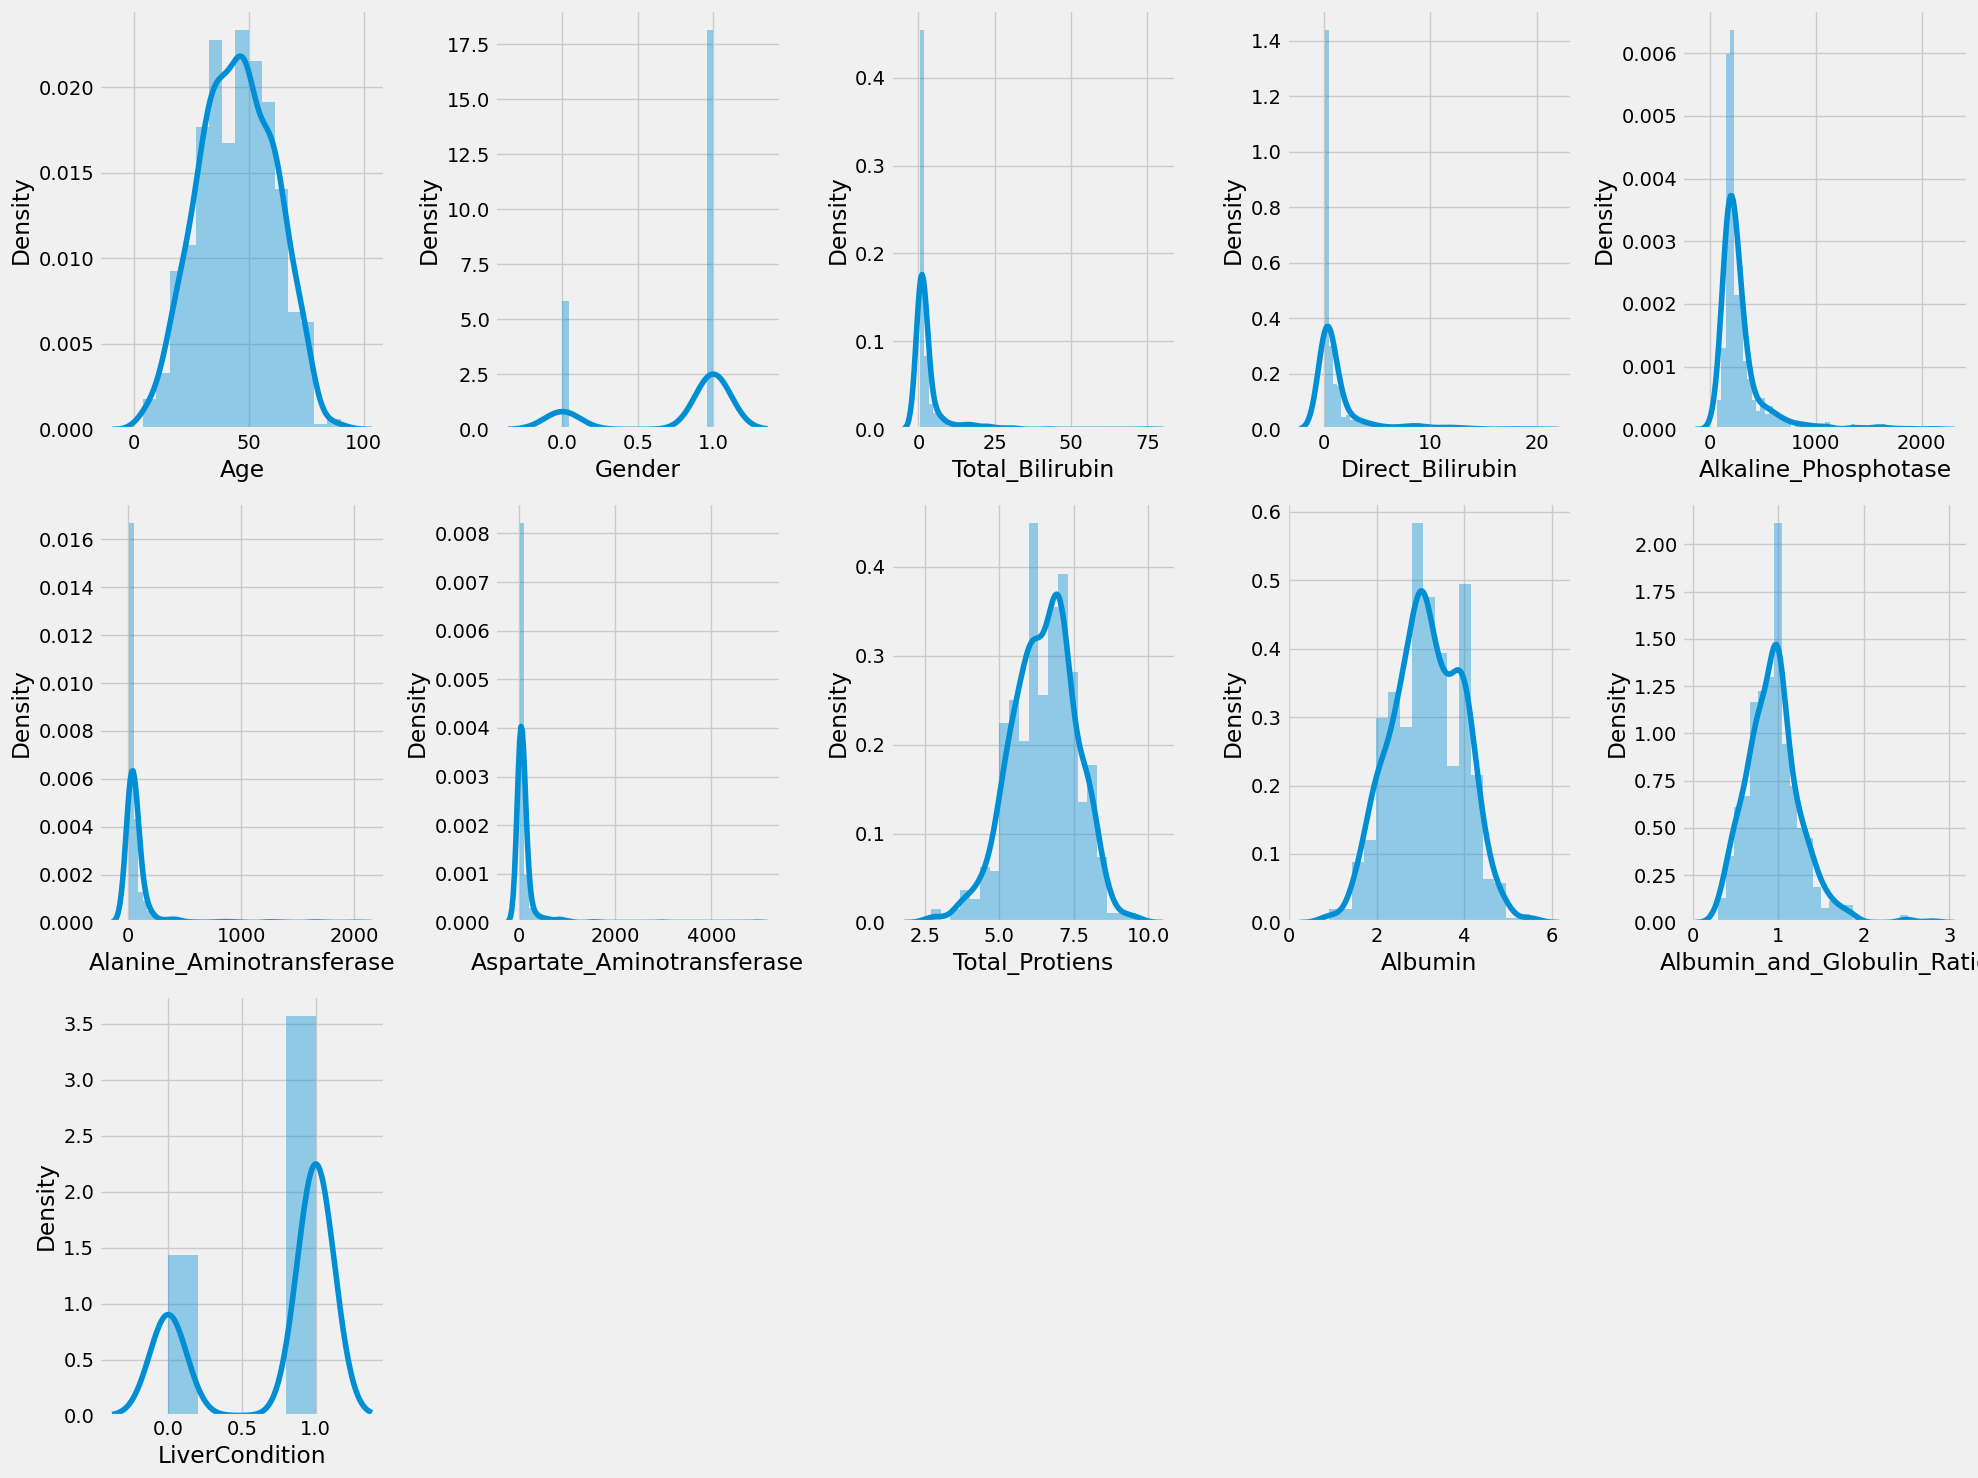

In [22]:
# still on the distribution

plt.figure(figsize = (20, 15))
plotnumber = 1

for column in df:
    if plotnumber <= 14:
        ax = plt.subplot(3, 5, plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column)
        
    plotnumber += 1

plt.tight_layout()
plt.show()

Some of the features have skewed distributions

Pairplot of all the features

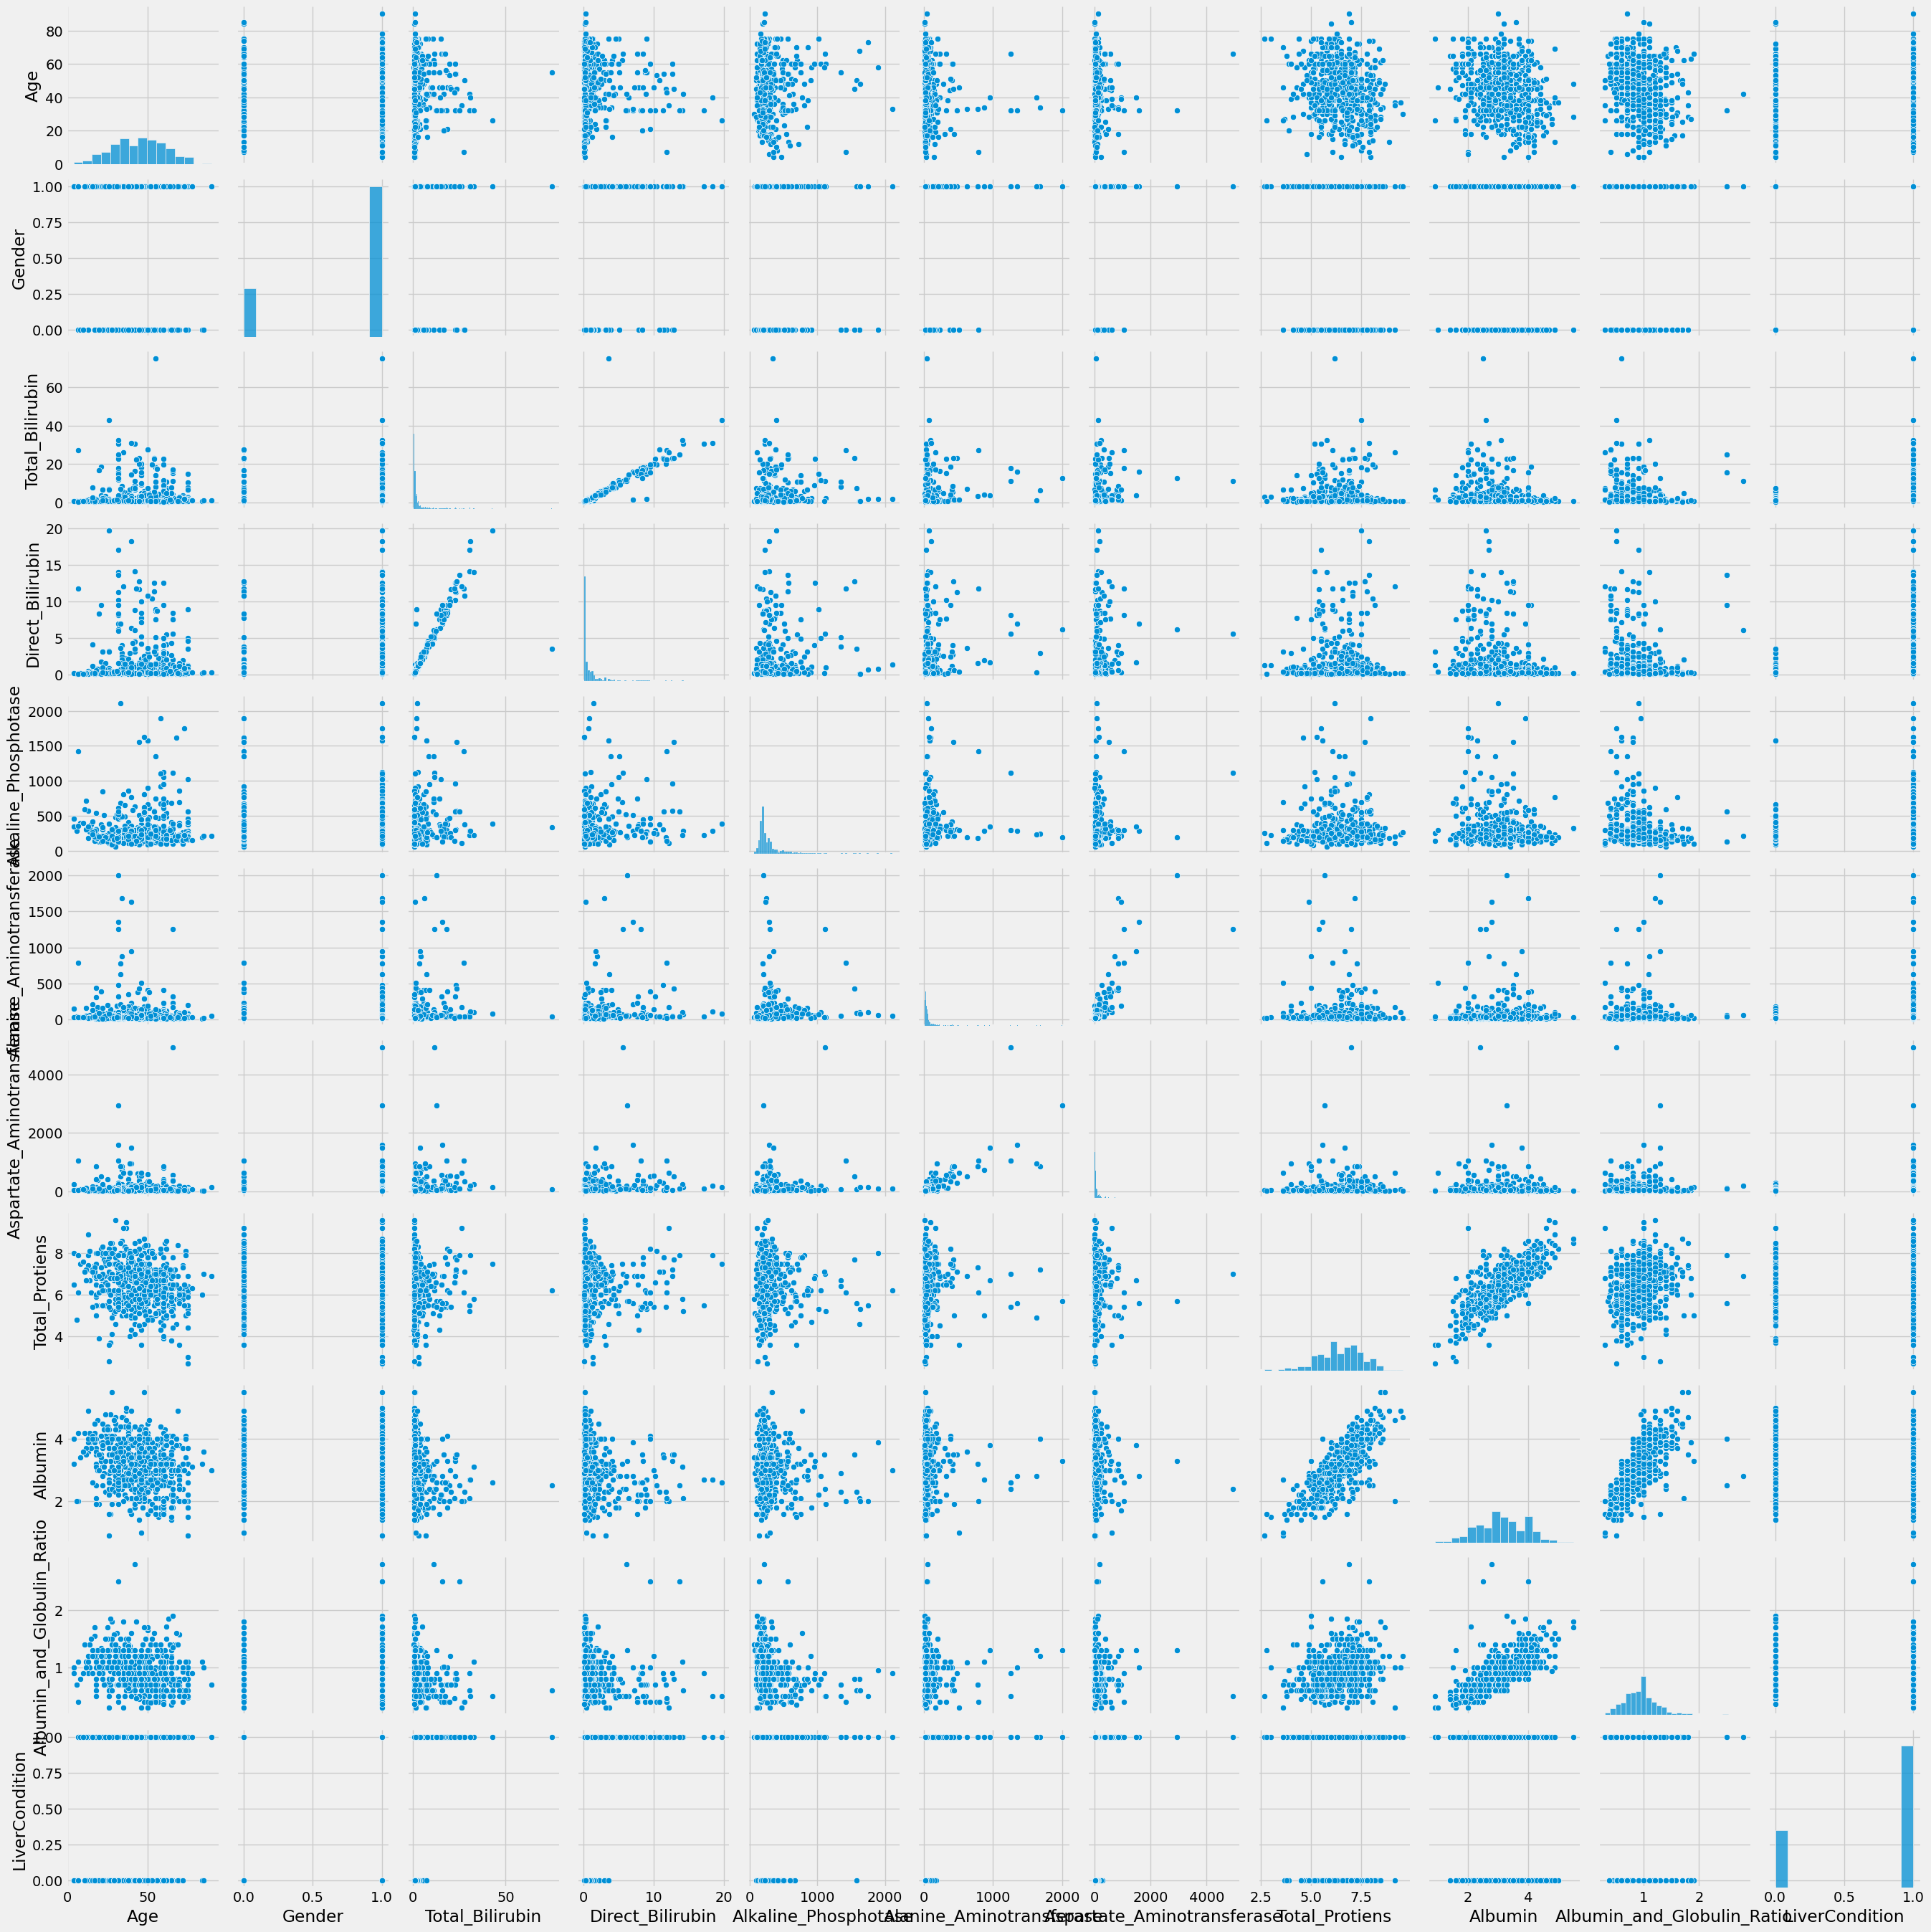

In [23]:
sns.pairplot(df)

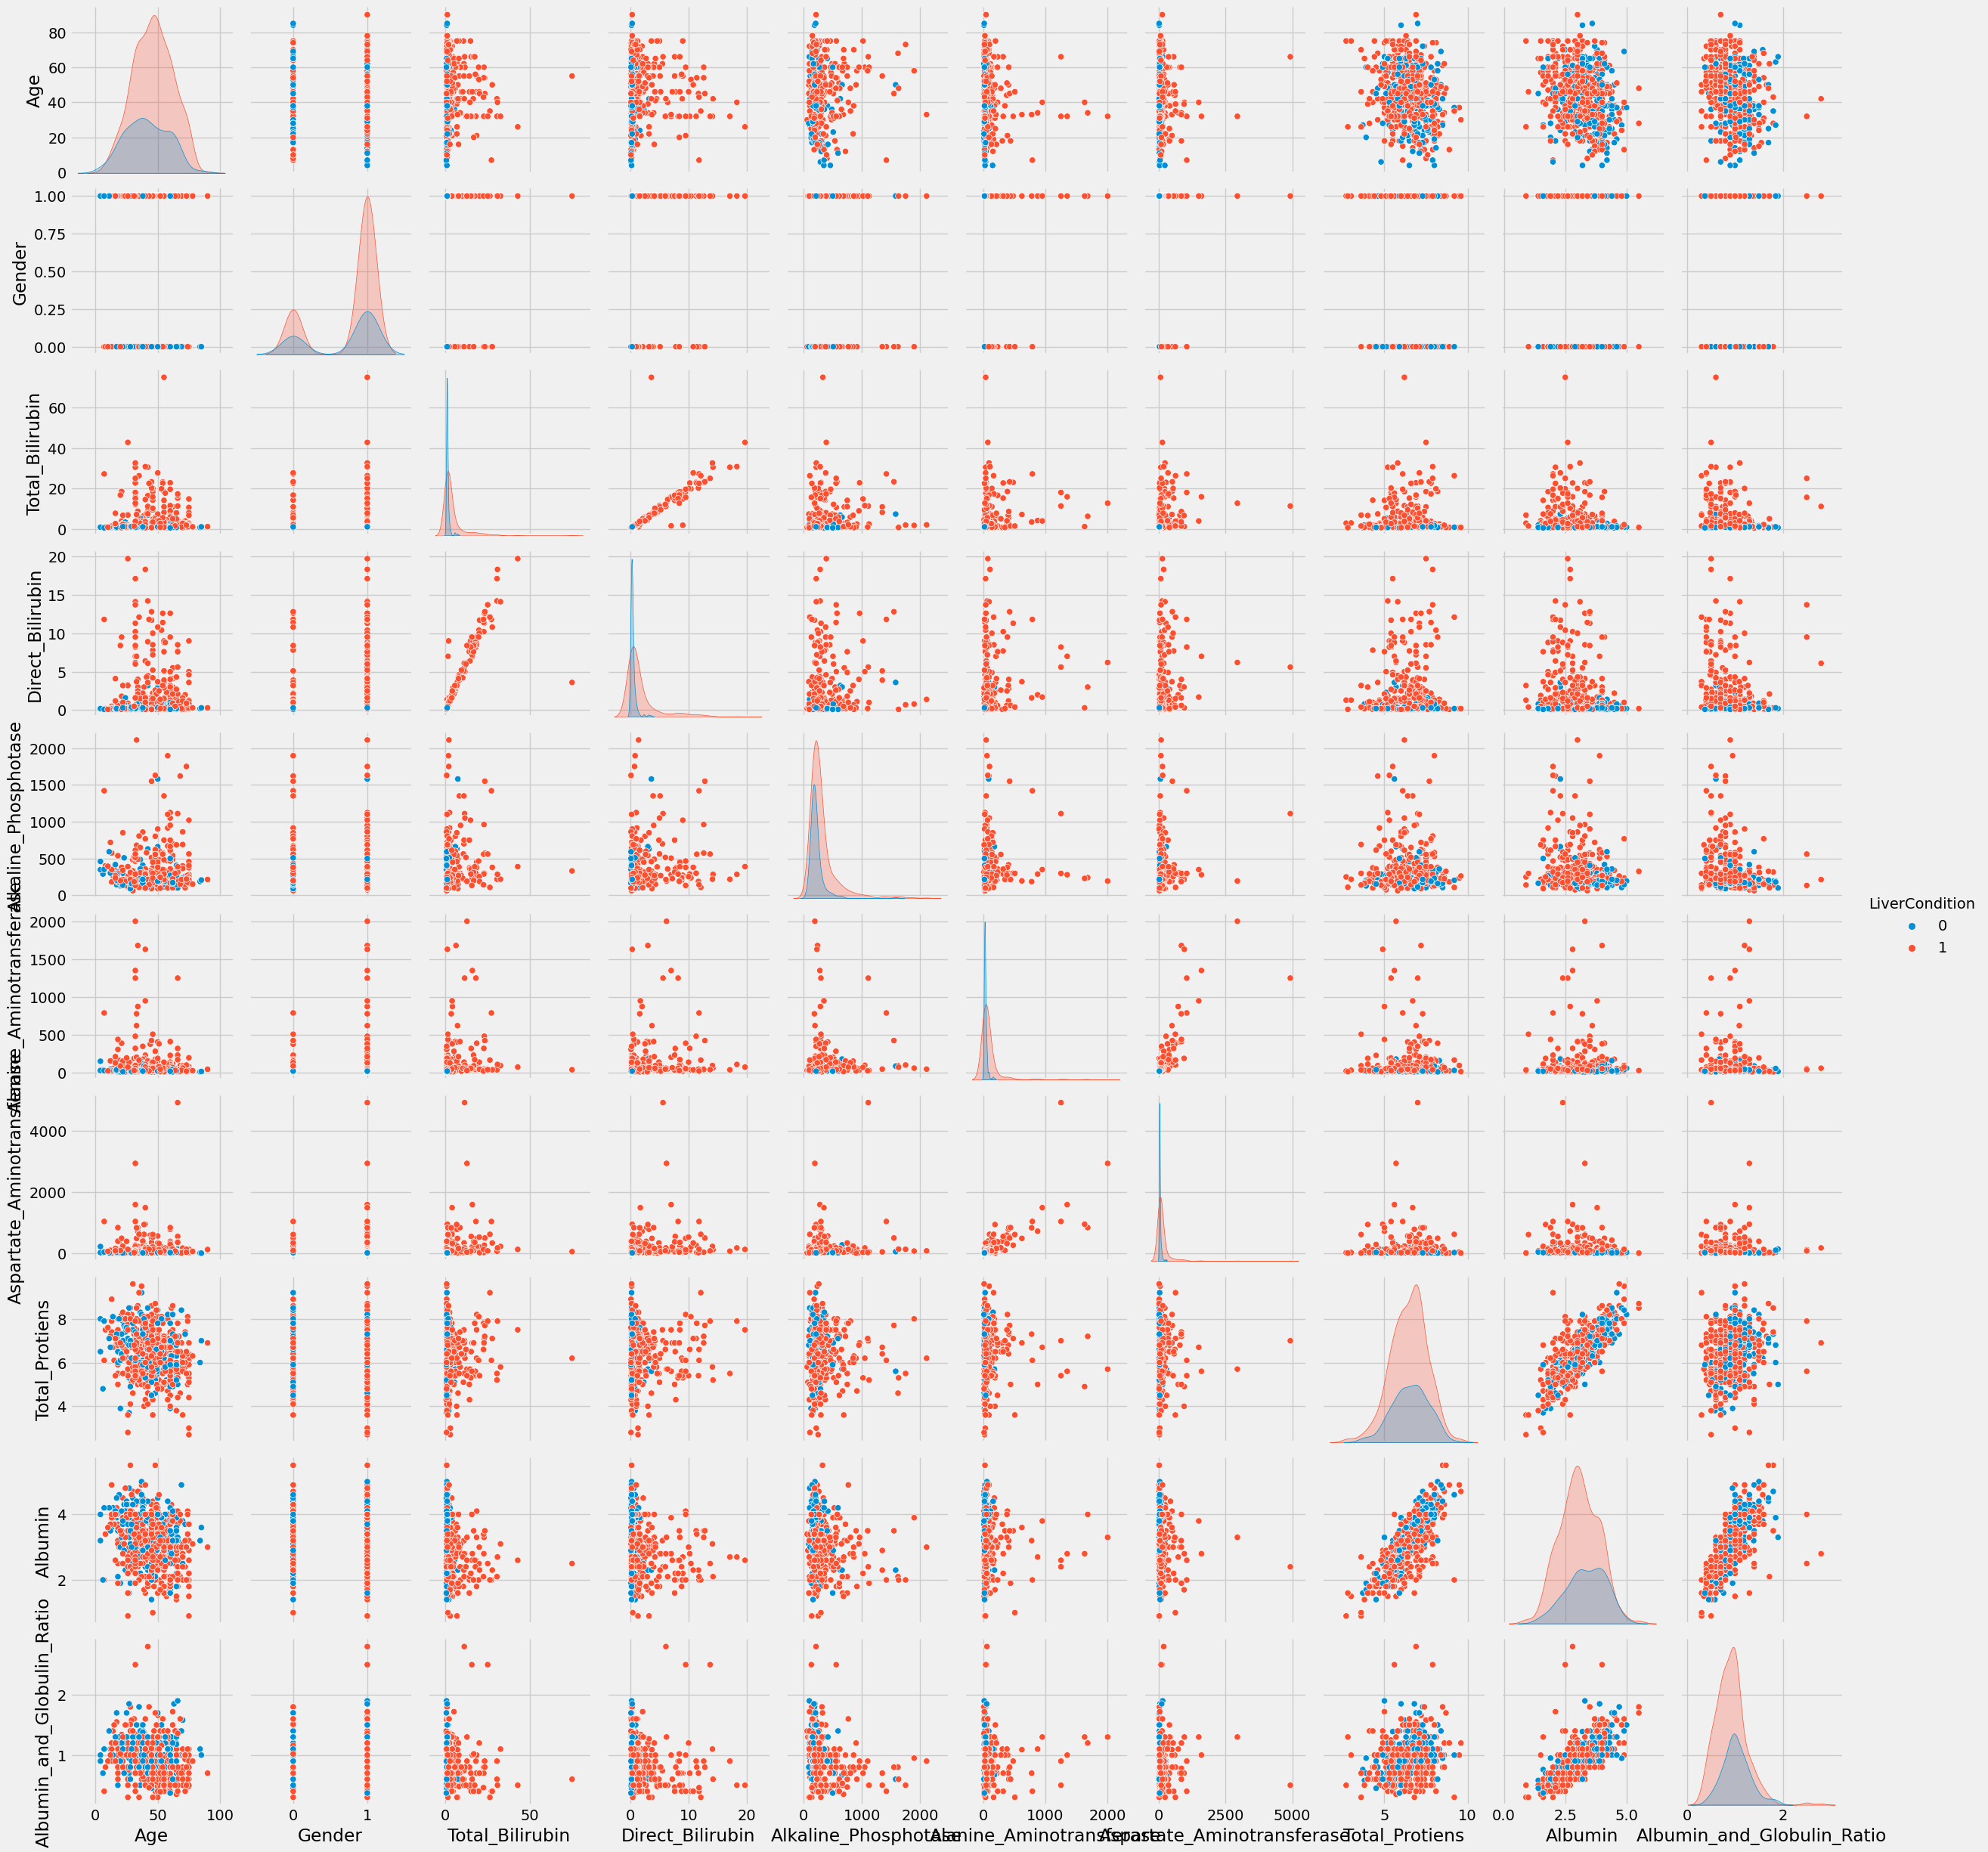

In [25]:
# How are the predictor variables related to the outcome variable?
sns.pairplot(df, hue="LiverCondition", diag_kind="kde")
plt.show()

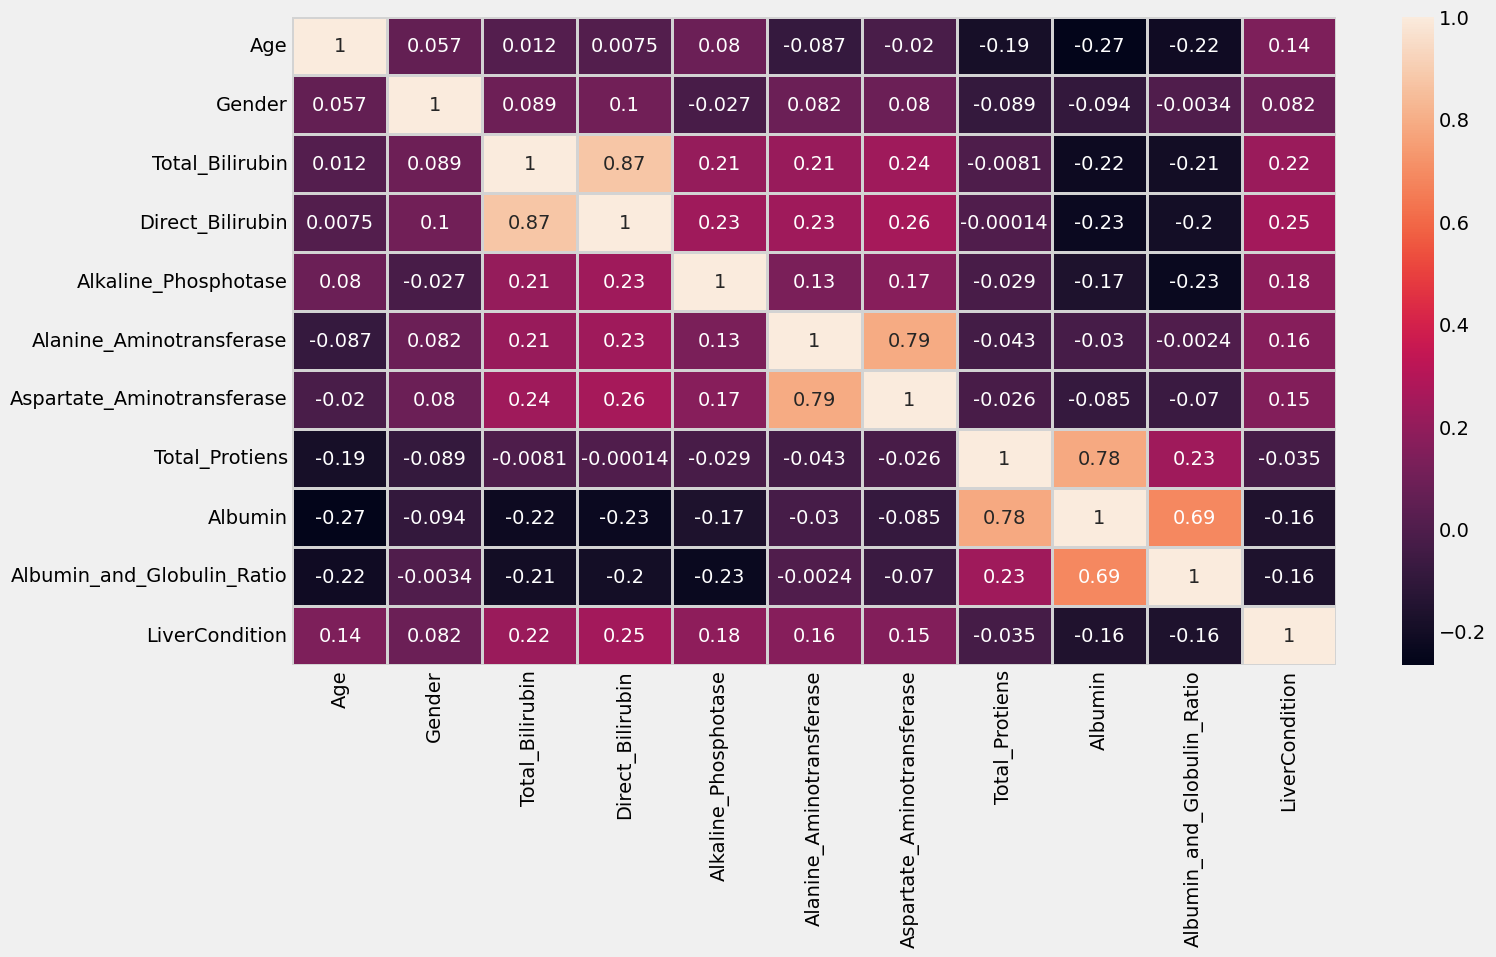

In [26]:
# heatmap of data

plt.figure(figsize = (15, 8))

sns.heatmap(df.corr(), annot = True, linewidths = 2, linecolor = 'lightgrey')
plt.show()

Analysing the categorical features

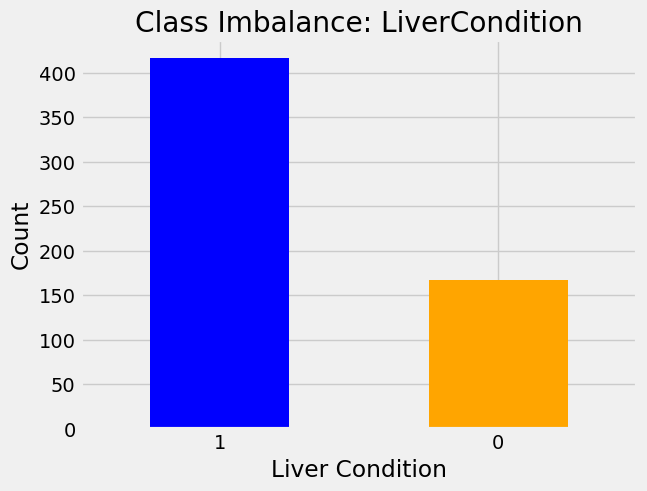

Number of patients diagnosed with liver disease:  416
Number of patients with normal liver :  167


In [38]:
# Investigate class imbalance
class_counts = df['LiverCondition'].value_counts()
class_counts.plot(kind='bar', color=['blue', 'orange'])
plt.title("Class Imbalance: LiverCondition")
plt.xlabel("Liver Condition")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()

LD, NL = df['LiverCondition'].value_counts()
print('Number of patients diagnosed with liver disease: ',LD)
print('Number of patients with normal liver : ',NL)

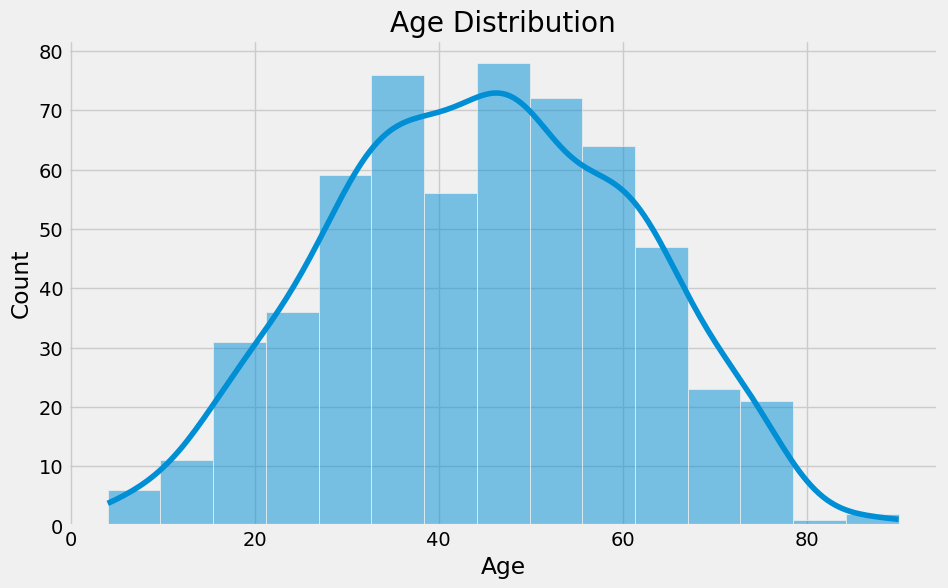

In [28]:
# Histograms and Density Plots
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x="Age", kde=True)
plt.title("Age Distribution")
plt.show()

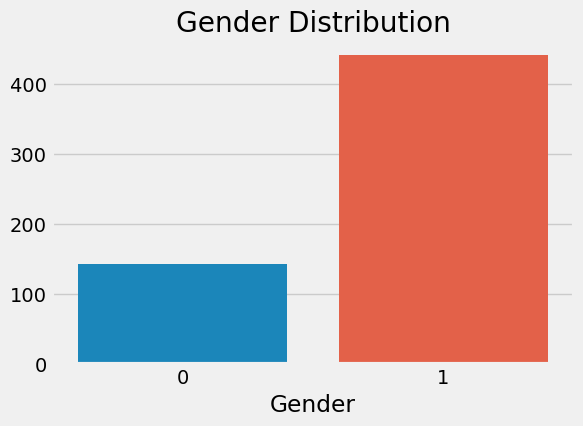

Number of patients that are male:  441
Number of patients that are female:  142


In [33]:
# Categorical Features
gender_distribution = df["Gender"].value_counts()
plt.figure(figsize=(6, 4))
sns.barplot(x=gender_distribution.index, y=gender_distribution.values)
plt.title("Gender Distribution")
plt.show()
M, F = df['Gender'].value_counts()
print('Number of patients that are male: ',M)
print('Number of patients that are female: ',F)

In [36]:
age_distribution = df.groupby(['LiverCondition', 'Gender'])['Age'].mean().reset_index()
age_distribution = age_distribution.rename(columns={'Age': 'Mean_Age'})

print(age_distribution)


   LiverCondition  Gender   Mean_Age
0               0       0  42.740000
1               0       1  40.598291
2               1       0  43.347826
3               1       1  46.950617


In [37]:
# Make a copy of the DataFrame
data = df.copy()

Identifying Significant Features and their relationship with liver condition

OLS linear Regression Model

In [39]:
# Separate features and target variable
X = df.drop('LiverCondition', axis=1)  # Features
y = df['LiverCondition']  # Target variable

X = sm.add_constant(X)
model = sm.OLS(y, X) #instantiate
results = model.fit() #fit the model (this is where OLS is actually being run)
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:         LiverCondition   R-squared:                       0.120
Model:                            OLS   Adj. R-squared:                  0.105
Method:                 Least Squares   F-statistic:                     7.812
Date:                Sat, 12 Aug 2023   Prob (F-statistic):           8.38e-12
Time:                        12:14:18   Log-Likelihood:                -327.11
No. Observations:                 583   AIC:                             676.2
Df Residuals:                     572   BIC:                             724.3
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In summary, the model's R-squared value is relatively low, suggesting that the included features explain only a small portion of the variance in the target variable. Some coefficients have p-values indicating statistical significance, while others do not

Further analysis to identify significant features using a more complex model

In [40]:
# Feature Importance Analysis (using Random Forest as an example)
from sklearn.ensemble import RandomForestClassifier

In [41]:
X = df.drop(["LiverCondition"], axis=1)
y = df["LiverCondition"]

In [42]:
model = RandomForestClassifier()
model.fit(X, y)

RandomForestClassifier()

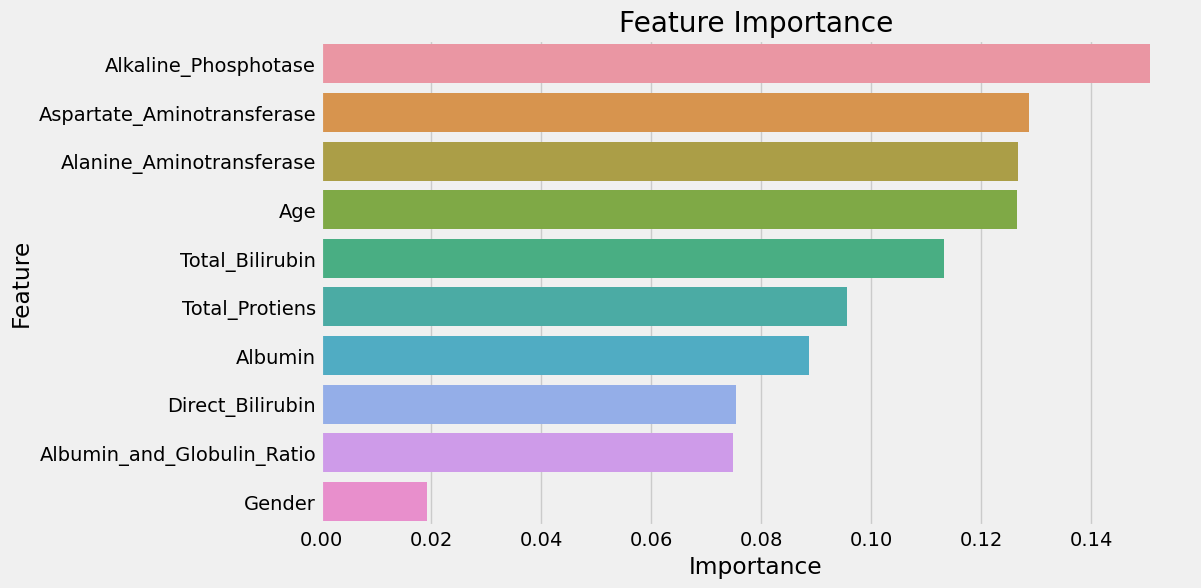

In [43]:
feature_importance = model.feature_importances_
feature_importance_df = pd.DataFrame({"Feature": X.columns, "Importance": feature_importance})
feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=feature_importance_df)
plt.title("Feature Importance")
plt.show()

Higher scores indicate that the feature has a stronger influence on the model's predictions. These scores are calculated based on how often a feature is used to make decisions that result in correct predictions.

Anlysing the top 6 features (3 - enzymes(Alkaline_Phosphotase, Aspartate_Aminotransferase, and Alanine_Aminotransferase), age, and 2 - proteins(Total_Bilirubin and Total Protiens)

In [49]:
grouped = df.groupby(['LiverCondition'])
df_normal = grouped.get_group((0))
df_diseased = grouped.get_group((1))

In [44]:
# defining functions to create plot

def violin(col):
    fig = px.violin(df, y=col, x="LiverCondition", color="LiverCondition", box=True, template = 'plotly_dark')
    return fig.show()

def kde(col):
    grid = sns.FacetGrid(df, hue="LiverCondition", height = 6, aspect=2)
    grid.map(sns.kdeplot, col)
    grid.add_legend()
    
def scatter(col1, col2):
    fig = px.scatter(df, x=col1, y=col2, color="LiverCondition", template = 'plotly_dark')
    return fig.show()

In [45]:
#Use of scatterplot to demonstrate relationship between Alkaline_phosphatase and health of the liver
scatter('Alkaline_Phosphotase', 'LiverCondition')

In [46]:
violin('Alkaline_Phosphotase')

<Axes: xlabel='Alkaline_Phosphotase', ylabel='LiverCondition'>

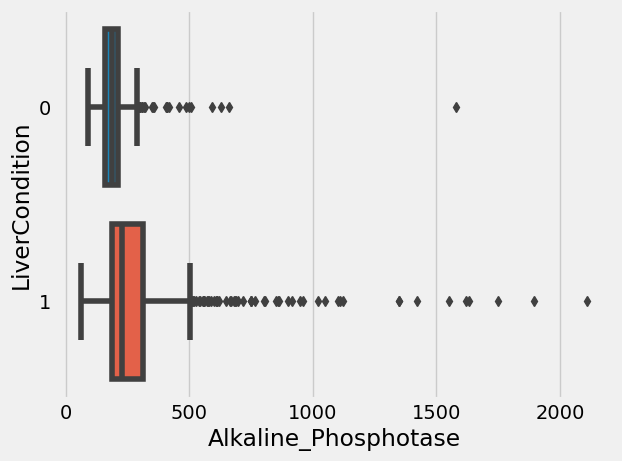

In [47]:
#Using boxplot
sns.boxplot(x=df['Alkaline_Phosphotase'], y=df['LiverCondition'],orient='h')

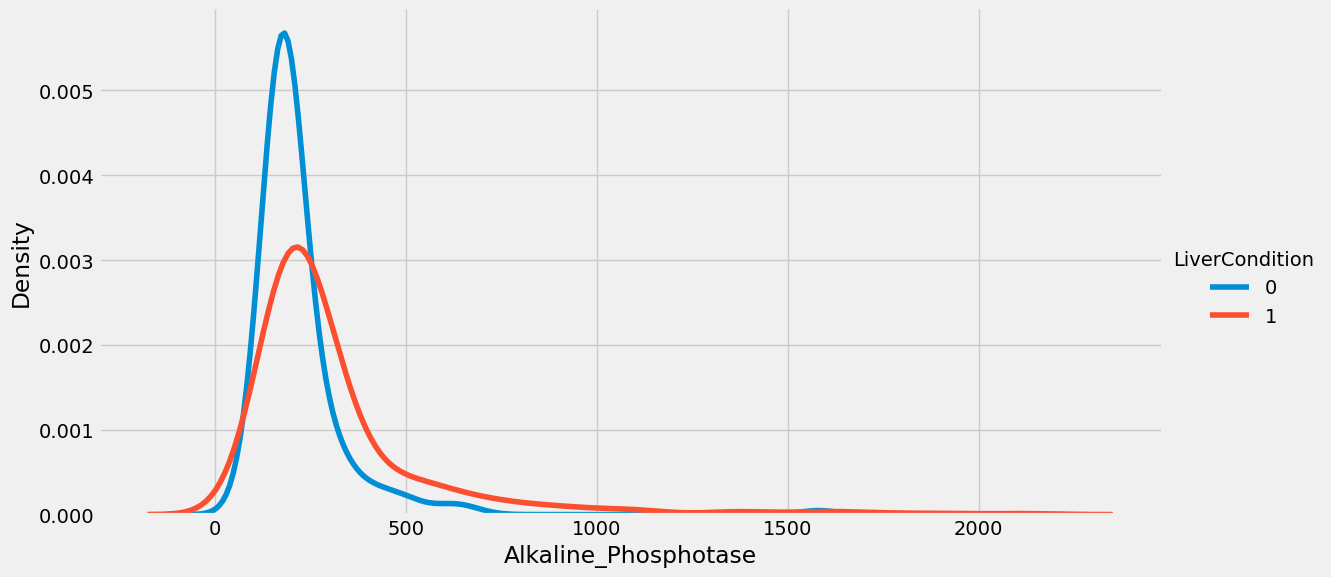

In [48]:
kde('Alkaline_Phosphotase')

T-test

In [50]:
normal_Alkaline_Phosphotase = df_normal['Alkaline_Phosphotase']
diseased_Alkaline_Phosphotase = df_diseased['Alkaline_Phosphotase']

In [51]:
print(normal_Alkaline_Phosphotase.mean(), diseased_Alkaline_Phosphotase.mean())
stat, p = ttest_ind(normal_Alkaline_Phosphotase,diseased_Alkaline_Phosphotase)
p

219.75449101796409 319.00721153846155


7.027486640526998e-06

Since the p-value is <0.05, we reject the null hypothesis that the averages are equal. Therefore, we would conclude that the averages of Alkaline_Phosphotase of normal and diseased liver are significantly different

In [55]:
#Scatterplot of Alamine Aminotransferase versus liver condition
scatter('Alanine_Aminotransferase', 'LiverCondition')

In [56]:
#Violin of Alamine_Aminotransferase versus Liver Condition
violin('Alanine_Aminotransferase')

<Axes: xlabel='Alanine_Aminotransferase', ylabel='LiverCondition'>

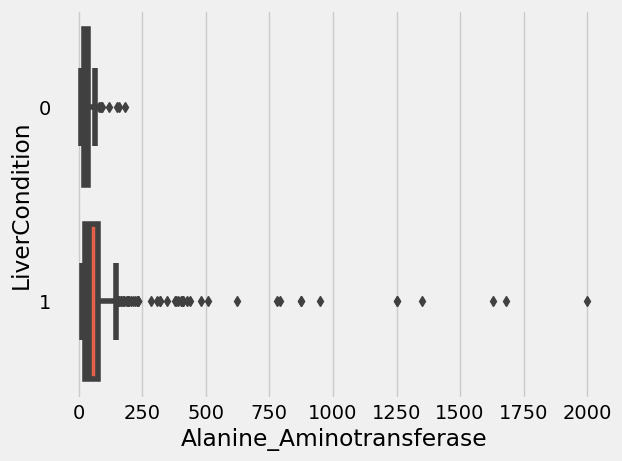

In [58]:
#Boxplot of Alanine_Aminotransferase versus Liver Condition
sns.boxplot(x=df['Alanine_Aminotransferase'], y=df['LiverCondition'],orient='h')

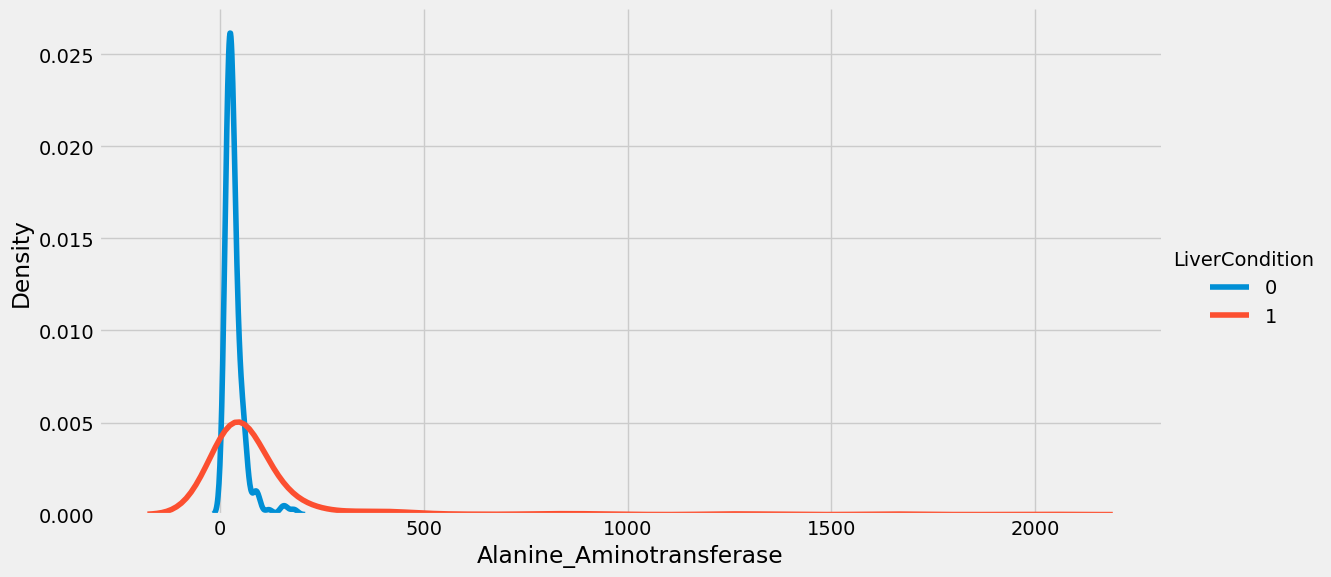

In [59]:
#kernel density estimate (KDE) plot
kde('Alanine_Aminotransferase')

T-test

In [60]:
normal_Alanine_Aminotransferase = df_normal['Alanine_Aminotransferase']
diseased_Alanine_Aminotransferase = df_diseased['Alanine_Aminotransferase']

In [61]:
print(normal_Alanine_Aminotransferase.mean(), diseased_Alanine_Aminotransferase.mean())
stat, p = ttest_ind(normal_Alanine_Aminotransferase,diseased_Alanine_Aminotransferase)
p

33.65269461077844 99.60576923076923


7.371781222193733e-05

Since the p-value is <0.05, we reject the null hypothesis that the averages are equal. Therefore, we would conclude that the averages of Alanine_Aminotransferase of normal and diseased liver are significantly different

In [64]:
#Scatterplot of Aspartate_Aminotransferase versus liver condition
scatter('Aspartate_Aminotransferase', 'LiverCondition')

In [65]:
#Violin of Aspartate_Aminotransferase versus Liver Condition
violin('Aspartate_Aminotransferase')

<Axes: xlabel='Aspartate_Aminotransferase', ylabel='LiverCondition'>

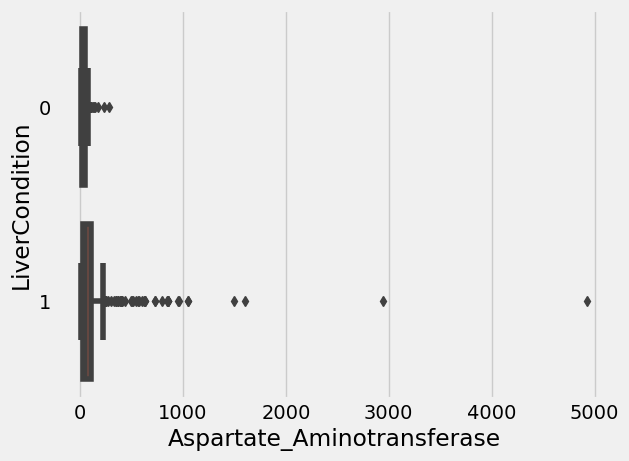

In [66]:
#Boxplot of Aspartate_Aminotransferase versus Liver Condition
sns.boxplot(x=df['Aspartate_Aminotransferase'], y=df['LiverCondition'],orient='h')

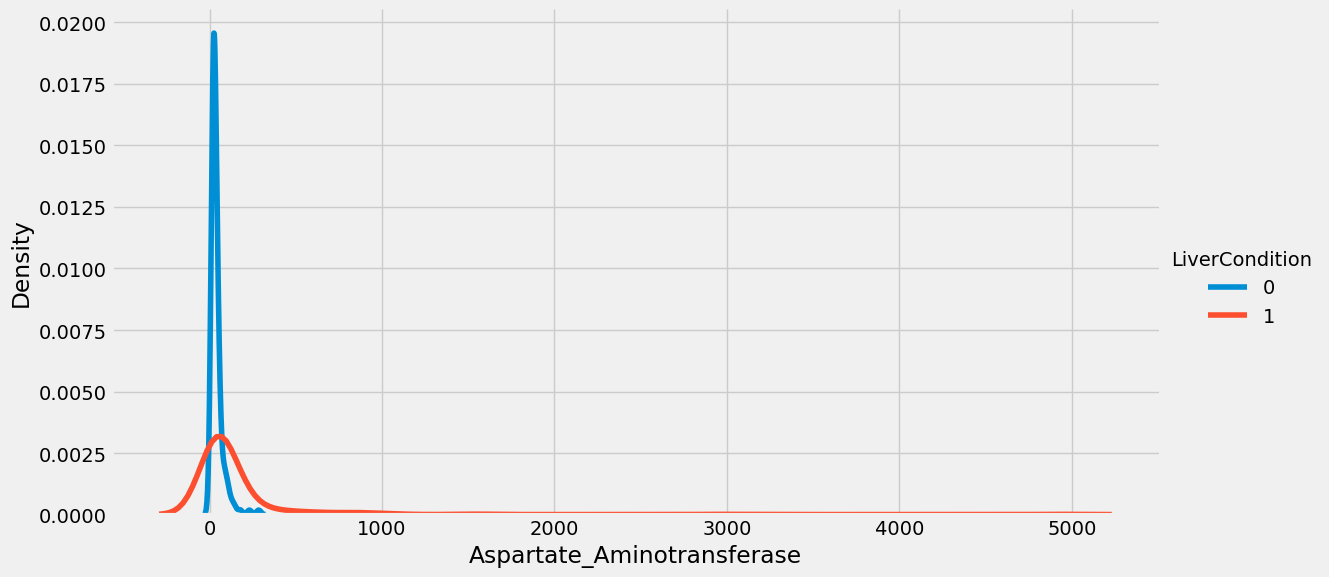

In [67]:
#kernel density estimate (KDE) plot for the 'Aspartate_Aminotransferase'
kde('Aspartate_Aminotransferase')

T-test

In [68]:
normal_Aspartate_Aminotransferase = df_normal['Aspartate_Aminotransferase']
diseased_Aspartate_Aminotransferase = df_diseased['Aspartate_Aminotransferase']

In [69]:
print(normal_Aspartate_Aminotransferase.mean(), diseased_Aspartate_Aminotransferase.mean())
stat, p = ttest_ind(normal_Aspartate_Aminotransferase,diseased_Aspartate_Aminotransferase)
p

40.68862275449102 137.69951923076923


0.00023139008403085087

Since the p-value is <0.05, we reject the null hypothesis that the averages are equal. Therefore, we would conclude that the averages of Aspartate_Aminotransferase of normal and diseased liver are significantly different

In [70]:
#Scatterplot of Total_Bilirubin versus liver condition
scatter('Total_Bilirubin', 'LiverCondition')

In [71]:
#Violin of Total_Bilirubin versus Liver Condition
violin('Total_Bilirubin')

<Axes: xlabel='Total_Bilirubin', ylabel='LiverCondition'>

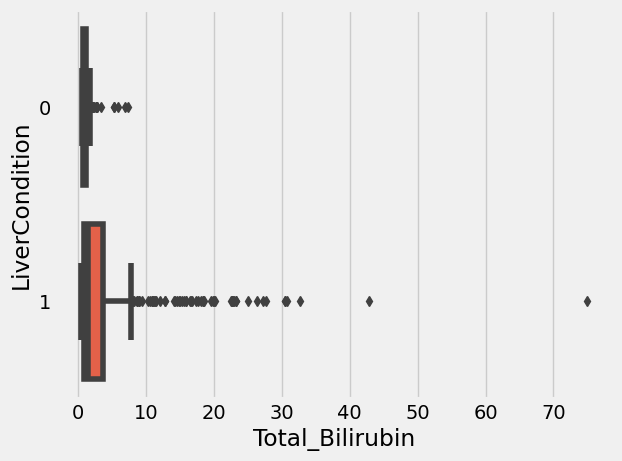

In [72]:
#Boxplot of Total_Bilirubin versus Liver Condition
sns.boxplot(x=df['Total_Bilirubin'], y=df['LiverCondition'],orient='h')

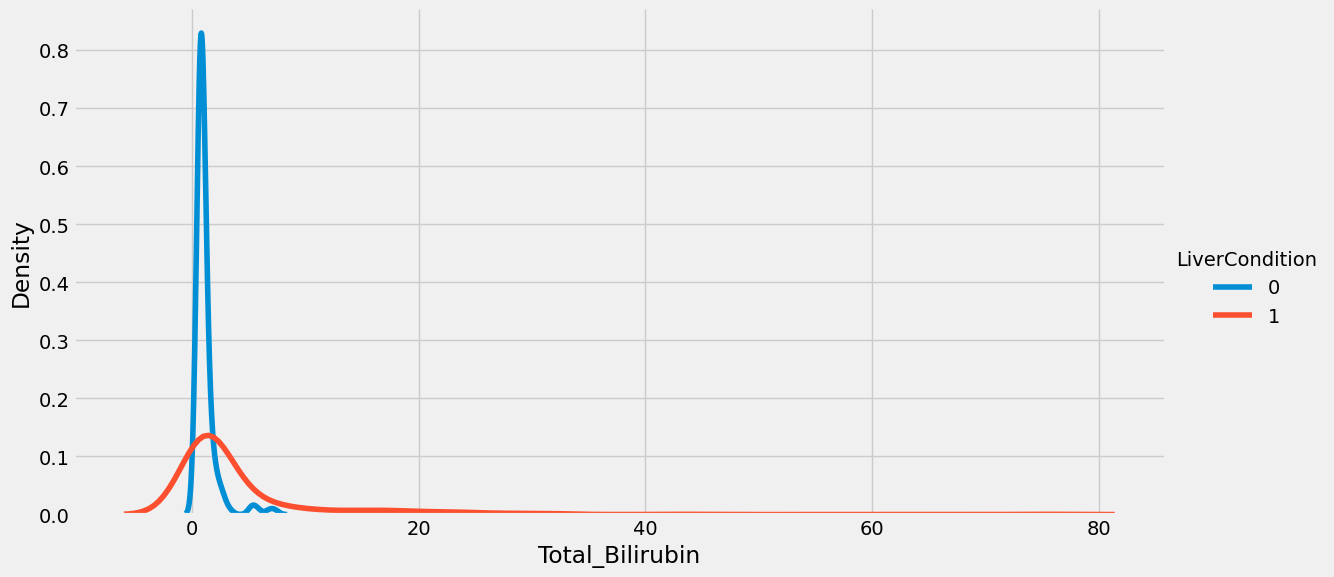

In [73]:
#kernel density estimate (KDE) plot for the 'Total_Bilirubin'
kde('Total_Bilirubin')

T-test

In [74]:
normal_Total_Bilirubin = df_normal['Total_Bilirubin']
diseased_Total_Bilirubin = df_diseased['Total_Bilirubin']

In [75]:
print(normal_Total_Bilirubin.mean(), diseased_Total_Bilirubin.mean())
stat, p = ttest_ind(normal_Total_Bilirubin,diseased_Total_Bilirubin)
p

1.1425149700598802 4.164423076923077


7.801430929364345e-08

Since the p-value is <0.05, we reject the null hypothesis that the averages are equal. Therefore, we would conclude that the averages of Total_Bilirubin of normal and diseased liver are significantly different

In [76]:
#Scatterplot of Albumin versus liver condition
scatter('Albumin', 'LiverCondition')

In [77]:
#Violin of Albumin versus Liver Condition
violin('Albumin')

<Axes: xlabel='Albumin', ylabel='LiverCondition'>

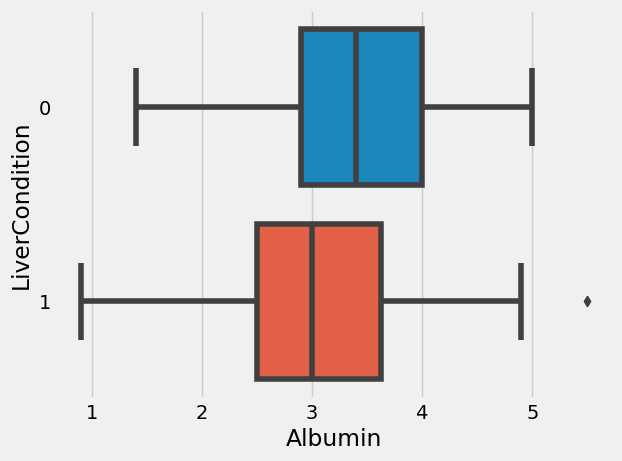

In [78]:
#Boxplot of Albumin versus Liver Condition
sns.boxplot(x=df['Albumin'], y=df['LiverCondition'],orient='h')

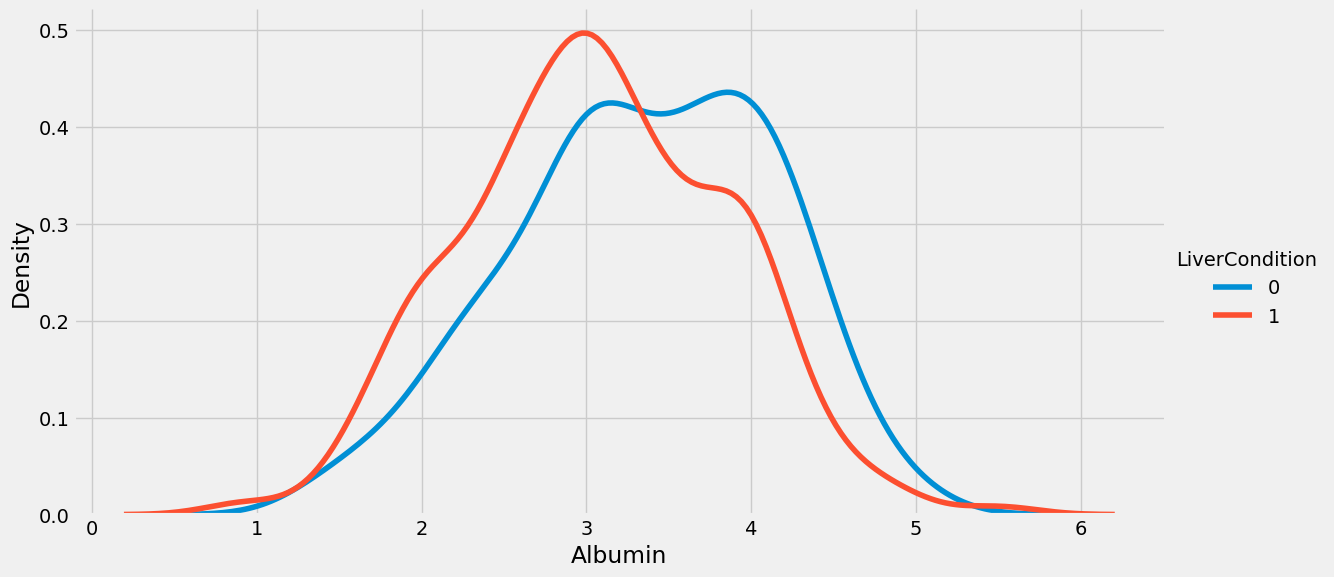

In [79]:
#kernel density estimate (KDE) plot for the 'Albumin'
kde('Albumin')

T-test

In [80]:
normal_Albumin = df_normal['Albumin']
diseased_Albumin = df_diseased['Albumin']

In [81]:
print(normal_Albumin.mean(), diseased_Albumin.mean())
stat, p = ttest_ind(normal_Albumin,diseased_Albumin)
p

3.344311377245509 3.060576923076923


9.074360842955469e-05

Since the p-value is <0.05, we reject the null hypothesis that the averages are equal. Therefore, we would conclude that the averages of Albumin of normal and diseased liver are significantly different

In [82]:
#Scatterplot of Age versus liver condition
scatter('Age', 'LiverCondition')

In [83]:
##Violin of Age versus Liver Condition
violin('Age')

<Axes: xlabel='Albumin', ylabel='LiverCondition'>

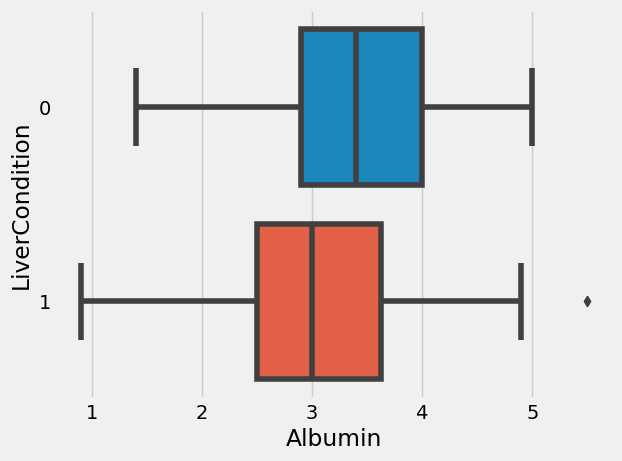

In [84]:
##Boxplot of Age versus Liver Condition
sns.boxplot(x=df['Albumin'], y=df['LiverCondition'],orient='h')

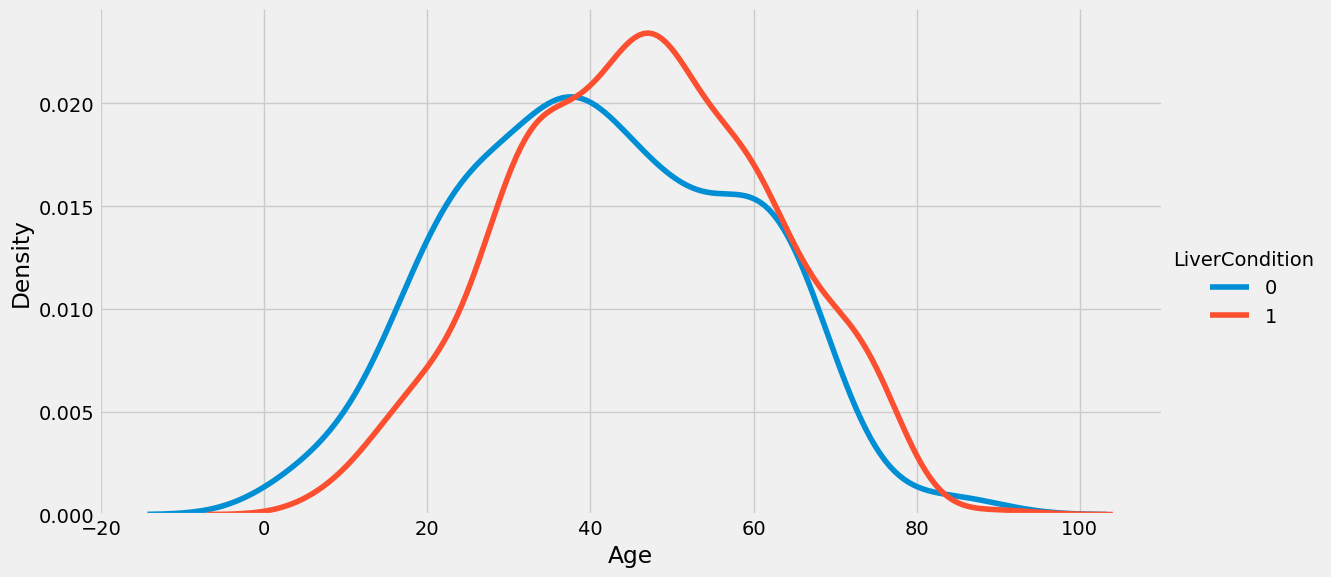

In [85]:
##kernel density estimate (KDE) plot for the 'Age'
kde('Age')

T-test

In [86]:
normal_Age = df_normal['Age']
diseased_Age = df_diseased['Age']

In [87]:
print(normal_Age.mean(), diseased_Age.mean())
stat, p = ttest_ind(normal_Age,diseased_Age)
p

41.23952095808383 46.15384615384615


0.0008840631556261403

Since the p-value is <0.05, we reject the null hypothesis that the averages are equal. Therefore, we would conclude that the averages of Age of normal and diseased liver are significantly different

Exploring correlations among features

In [133]:
#Age and protein
scatter('Age', 'Total_Protiens')

In [134]:
#Age and enzyme
scatter('Age', 'Alkaline_Phosphotase')

In [135]:
#Protein vs protein
scatter('Albumin', 'Total_Protiens')

In [136]:
#Protein vs protein
scatter('Direct_Bilirubin', 'Total_Bilirubin')

In [139]:
#Protein vs protein
scatter('Albumin', 'Albumin_and_Globulin_Ratio')

In [138]:
#Enzyme vs enzyme
scatter('Alanine_Aminotransferase', 'Aspartate_Aminotransferase')

In [140]:
#Enzyme vs Protein
scatter('Alkaline_Phosphotase', 'Total_Bilirubin')

In [143]:
#Enzyme vs Protein
scatter('Alanine_Aminotransferase', 'Total_Protiens')

Observation:

#From the above jointplots and scatterplots, we find direct relationship between protien features:
Direct_Bilirubin & Total_Bilirubin, Albumin & Total_Protiens,  and Albumin & Albumin_and_Globulin_Ratio

#We find direct relationship between enzyme features:
Aspartate_Aminotransferase & Alamine_Aminotransferase

#But no relationship between enzymes and protiens and also between age and other features

Feature Engineering to optimize model performance

In [88]:
#Handling imbalanced data
df.groupby('LiverCondition').count()

Age  Gender  Total_Bilirubin  Direct_Bilirubin  \
LiverCondition                                                   
0               167     167              167               167   
1               416     416              416               416   

                Alkaline_Phosphotase  Alanine_Aminotransferase  \
LiverCondition                                                   
0                                167                       167   
1                                416                       416   

                Aspartate_Aminotransferase  Total_Protiens  Albumin  \
LiverCondition                                                        
0                                      167             167      167   
1                                      416             416      416   

                Albumin_and_Globulin_Ratio  
LiverCondition                              
0                                      167  
1                                      416

In [89]:
from imblearn.over_sampling import SMOTE

# Separate features and target variable
X = df.drop('LiverCondition', axis=1)  # Features
y = df['LiverCondition']  # Target variable

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to generate synthetic samples of the minority class
X_resampled, y_resampled = smote.fit_resample(X, y)

# Update the dataset with the resampled data
df = pd.concat([X_resampled, y_resampled], axis=1)

In [90]:
#Verifying outcome
df.groupby('LiverCondition').count()

Age  Gender  Total_Bilirubin  Direct_Bilirubin  \
LiverCondition                                                   
0               416     416              416               416   
1               416     416              416               416   

                Alkaline_Phosphotase  Alanine_Aminotransferase  \
LiverCondition                                                   
0                                416                       416   
1                                416                       416   

                Aspartate_Aminotransferase  Total_Protiens  Albumin  \
LiverCondition                                                        
0                                      416             416      416   
1                                      416             416      416   

                Albumin_and_Globulin_Ratio  
LiverCondition                              
0                                      416  
1                                      416

In [91]:
# Make a copy of the DataFrame
data_new = df.copy()

In [92]:
# data to a CSV file to study the data in csv/excel
data_new.to_csv('data.csv', index=False)

MODEL BUILDING

In [94]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.feature_selection import SelectKBest, f_classif

In [95]:
# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Define feature selection pipeline
feature_selection_pipeline = Pipeline([
    ('scaling', StandardScaler()),  # Standardize features
    ('normalization', MinMaxScaler()),  # Normalize features
    ('feature_selection', SelectKBest(score_func=f_classif, k='all'))  # Feature selection
])

In [96]:
# Fit and transform features in the pipeline
X_train_selected = feature_selection_pipeline.fit_transform(X_train, y_train)
X_test_selected = feature_selection_pipeline.transform(X_test)


Decision Tree Classifier

In [97]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(X_train_selected, y_train)

# accuracy score, confusion matrix and classification report of decision tree

dtc_acc = accuracy_score(y_test, dtc.predict(X_test_selected))

print(f"Training Accuracy of Decision Tree Classifier is {accuracy_score(y_train, dtc.predict(X_train_selected))}")
print(f"Test Accuracy of Decision Tree Classifier is {dtc_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, dtc.predict(X_test_selected))}\n")
print(f"Classification Report :- \n {classification_report(y_test, dtc.predict(X_test_selected))}")

Training Accuracy of Decision Tree Classifier is 1.0
Test Accuracy of Decision Tree Classifier is 0.8143712574850299 

Confusion Matrix :- 
[[77 15]
 [16 59]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.83      0.84      0.83        92
           1       0.80      0.79      0.79        75

    accuracy                           0.81       167
   macro avg       0.81      0.81      0.81       167
weighted avg       0.81      0.81      0.81       167



In [121]:
# hyper parameter tuning of decision tree 

from sklearn.model_selection import GridSearchCV
grid_param = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [3, 5, 7, 10],
    'splitter' : ['best', 'random'],
    'min_samples_leaf' : [1, 2, 3, 5, 7],
    'min_samples_split' : [1, 2, 3, 5, 7],
    'max_features' : ['auto', 'sqrt', 'log2']
}

grid_search_dtc = GridSearchCV(dtc, grid_param, cv = 5, n_jobs = -1, verbose = 1)
grid_search_dtc.fit(X_train_selected, y_train)

Fitting 5 folds for each of 1200 candidates, totalling 6000 fits


GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(max_depth=7, max_features='log2',
                                              min_samples_split=7),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3, 5, 7],
                         'min_samples_split': [1, 2, 3, 5, 7],
                         'splitter': ['best', 'random']},
             verbose=1)

In [122]:
# best parameters and best score

print(grid_search_dtc.best_params_)
print(grid_search_dtc.best_score_)

{'criterion': 'entropy', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'splitter': 'best'}
0.7458646616541353


In [123]:
# best estimator

dtc = grid_search_dtc.best_estimator_

# accuracy score, confusion matrix and classification report of decision tree

dtc_acc = accuracy_score(y_test, dtc.predict(X_test_selected))

print(f"Training Accuracy of Decision Tree Classifier is {accuracy_score(y_train, dtc.predict(X_train_selected))}")
print(f"Test Accuracy of Decision Tree Classifier is {dtc_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, dtc.predict(X_test_selected))}\n")
print(f"Classification Report :- \n {classification_report(y_test, dtc.predict(X_test_selected))}")

Training Accuracy of Decision Tree Classifier is 0.8736842105263158
Test Accuracy of Decision Tree Classifier is 0.7365269461077845 

Confusion Matrix :- 
[[79 13]
 [31 44]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.72      0.86      0.78        92
           1       0.77      0.59      0.67        75

    accuracy                           0.74       167
   macro avg       0.75      0.72      0.72       167
weighted avg       0.74      0.74      0.73       167



Random Forest Classifier

In [120]:
from sklearn.ensemble import RandomForestClassifier

rd_clf = RandomForestClassifier(criterion='entropy', max_depth=11, max_features=None, min_samples_leaf=2, min_samples_split=3, n_estimators=130)
rd_clf.fit(X_train_selected, y_train)


# accuracy score, confusion matrix and classification report of random forest

rd_clf_acc = accuracy_score(y_test, rd_clf.predict(X_test_selected))

print(f"Training Accuracy of Random Forest Classifier is {accuracy_score(y_train, rd_clf.predict(X_train_selected))}")
print(f"Test Accuracy of Random Forest Classifier is {rd_clf_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, rd_clf.predict(X_test_selected))}\n")
print(f"Classification Report :- \n {classification_report(y_test, rd_clf.predict(X_test_selected))}")

Training Accuracy of Random Forest Classifier is 0.9804511278195489
Test Accuracy of Random Forest Classifier is 0.8083832335329342 

Confusion Matrix :- 
[[77 15]
 [17 58]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.82      0.84      0.83        92
           1       0.79      0.77      0.78        75

    accuracy                           0.81       167
   macro avg       0.81      0.81      0.81       167
weighted avg       0.81      0.81      0.81       167



Ada Boost Classifier

In [124]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(base_estimator = dtc)
ada.fit(X_train_selected, y_train)

# accuracy score, confusion matrix and classification report of ada boost

ada_acc = accuracy_score(y_test, ada.predict(X_test_selected))

print(f"Training Accuracy of Ada Boost Classifier is {accuracy_score(y_train, ada.predict(X_train_selected))}")
print(f"Test Accuracy of Ada Boost Classifier is {ada_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, ada.predict(X_test_selected))}\n")
print(f"Classification Report :- \n {classification_report(y_test, ada.predict(X_test_selected))}")

Training Accuracy of Ada Boost Classifier is 1.0
Test Accuracy of Ada Boost Classifier is 0.7964071856287425 

Confusion Matrix :- 
[[72 20]
 [14 61]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.84      0.78      0.81        92
           1       0.75      0.81      0.78        75

    accuracy                           0.80       167
   macro avg       0.80      0.80      0.80       167
weighted avg       0.80      0.80      0.80       167



Gradient Boosting Classifier

In [125]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier()
gb.fit(X_train_selected, y_train)

# accuracy score, confusion matrix and classification report of gradient boosting classifier

gb_acc = accuracy_score(y_test, gb.predict(X_test_selected))

print(f"Training Accuracy of Gradient Boosting Classifier is {accuracy_score(y_train, gb.predict(X_train_selected))}")
print(f"Test Accuracy of Gradient Boosting Classifier is {gb_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, gb.predict(X_test_selected))}\n")
print(f"Classification Report :- \n {classification_report(y_test, gb.predict(X_test_selected))}")

Training Accuracy of Gradient Boosting Classifier is 0.9428571428571428
Test Accuracy of Gradient Boosting Classifier is 0.7904191616766467 

Confusion Matrix :- 
[[72 20]
 [15 60]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.83      0.78      0.80        92
           1       0.75      0.80      0.77        75

    accuracy                           0.79       167
   macro avg       0.79      0.79      0.79       167
weighted avg       0.79      0.79      0.79       167



Stochastic Gradient Boosting (SGB)

In [126]:
sgb = GradientBoostingClassifier(max_depth = 4, subsample = 0.90, max_features = 0.75, n_estimators = 200)
sgb.fit(X_train_selected, y_train)

# accuracy score, confusion matrix and classification report of stochastic gradient boosting classifier

sgb_acc = accuracy_score(y_test, sgb.predict(X_test_selected))

print(f"Training Accuracy of Stochastic Gradient Boosting is {accuracy_score(y_train, sgb.predict(X_train_selected))}")
print(f"Test Accuracy of Stochastic Gradient Boosting is {sgb_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, sgb.predict(X_test_selected))}\n")
print(f"Classification Report :- \n {classification_report(y_test, sgb.predict(X_test_selected))}")

Training Accuracy of Stochastic Gradient Boosting is 1.0
Test Accuracy of Stochastic Gradient Boosting is 0.7904191616766467 

Confusion Matrix :- 
[[68 24]
 [11 64]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.86      0.74      0.80        92
           1       0.73      0.85      0.79        75

    accuracy                           0.79       167
   macro avg       0.79      0.80      0.79       167
weighted avg       0.80      0.79      0.79       167



XgBoost

In [127]:
from xgboost import XGBClassifier

xgb = XGBClassifier(objective = 'binary:logistic', learning_rate = 0.5, max_depth = 5, n_estimators = 150)
xgb.fit(X_train_selected, y_train)

# accuracy score, confusion matrix and classification report of xgboost

xgb_acc = accuracy_score(y_test, xgb.predict(X_test_selected))

print(f"Training Accuracy of XgBoost is {accuracy_score(y_train, xgb.predict(X_train_selected))}")
print(f"Test Accuracy of XgBoost is {xgb_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, xgb.predict(X_test_selected))}\n")
print(f"Classification Report :- \n {classification_report(y_test, xgb.predict(X_test_selected))}")

Training Accuracy of XgBoost is 1.0
Test Accuracy of XgBoost is 0.8323353293413174 

Confusion Matrix :- 
[[72 20]
 [ 8 67]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.90      0.78      0.84        92
           1       0.77      0.89      0.83        75

    accuracy                           0.83       167
   macro avg       0.84      0.84      0.83       167
weighted avg       0.84      0.83      0.83       167



Cat Boost Classifier

In [128]:
from catboost import CatBoostClassifier

cat = CatBoostClassifier(iterations=10)
cat.fit(X_train_selected, y_train)

Learning rate set to 0.5
0:	learn: 0.6075090	total: 141ms	remaining: 1.27s
1:	learn: 0.5563055	total: 142ms	remaining: 567ms
2:	learn: 0.5240466	total: 143ms	remaining: 333ms
3:	learn: 0.5051115	total: 144ms	remaining: 216ms
4:	learn: 0.4831007	total: 145ms	remaining: 145ms
5:	learn: 0.4674350	total: 146ms	remaining: 97.1ms
6:	learn: 0.4524657	total: 147ms	remaining: 62.8ms
7:	learn: 0.4445698	total: 147ms	remaining: 36.9ms
8:	learn: 0.4376270	total: 148ms	remaining: 16.5ms
9:	learn: 0.4242708	total: 149ms	remaining: 0us


In [129]:
# accuracy score, confusion matrix and classification report of cat boost

cat_acc = accuracy_score(y_test, cat.predict(X_test_selected))

print(f"Training Accuracy of Cat Boost Classifier is {accuracy_score(y_train, cat.predict(X_train_selected))}")
print(f"Test Accuracy of Cat Boost Classifier is {cat_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, cat.predict(X_test_selected))}\n")
print(f"Classification Report :- \n {classification_report(y_test, cat.predict(X_test_selected))}")

Training Accuracy of Cat Boost Classifier is 0.8165413533834587
Test Accuracy of Cat Boost Classifier is 0.7964071856287425 

Confusion Matrix :- 
[[76 16]
 [18 57]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.81      0.83      0.82        92
           1       0.78      0.76      0.77        75

    accuracy                           0.80       167
   macro avg       0.79      0.79      0.79       167
weighted avg       0.80      0.80      0.80       167



Extra Trees Classifier

In [130]:
from sklearn.ensemble import ExtraTreesClassifier

etc = ExtraTreesClassifier()
etc.fit(X_train_selected, y_train)

# accuracy score, confusion matrix and classification report of extra trees classifier

etc_acc = accuracy_score(y_test, etc.predict(X_test_selected))

print(f"Training Accuracy of Extra Trees Classifier is {accuracy_score(y_train, etc.predict(X_train_selected))}")
print(f"Test Accuracy of Extra Trees Classifier is {etc_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, etc.predict(X_test_selected))}\n")
print(f"Classification Report :- \n {classification_report(y_test, etc.predict(X_test_selected))}")

Training Accuracy of Extra Trees Classifier is 1.0
Test Accuracy of Extra Trees Classifier is 0.8323353293413174 

Confusion Matrix :- 
[[78 14]
 [14 61]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.85      0.85      0.85        92
           1       0.81      0.81      0.81        75

    accuracy                           0.83       167
   macro avg       0.83      0.83      0.83       167
weighted avg       0.83      0.83      0.83       167



Models Comparison

In [131]:
models = pd.DataFrame({
    'Model' : [ 'Decision Tree Classifier', 'Random Forest Classifier','Ada Boost Classifier',
             'Gradient Boosting Classifier', 'Stochastic Gradient Boosting', 'XgBoost', 'Cat Boost', 'Extra Trees Classifier'],
    'Score' : [ dtc_acc, rd_clf_acc, ada_acc, gb_acc, sgb_acc, xgb_acc, cat_acc, etc_acc]
})


models.sort_values(by = 'Score', ascending = False)

Model     Score
5                       XgBoost  0.832335
7        Extra Trees Classifier  0.832335
1      Random Forest Classifier  0.808383
2          Ada Boost Classifier  0.796407
6                     Cat Boost  0.796407
3  Gradient Boosting Classifier  0.790419
4  Stochastic Gradient Boosting  0.790419
0      Decision Tree Classifier  0.736527

In [132]:
px.bar(data_frame = models, x = 'Score', y = 'Model', color = 'Score', template = 'plotly_dark', 
       title = 'Models Comparison')